<a href="https://colab.research.google.com/github/MattJCR/Stable-Diffusion-Colab/blob/master/Stable_Diffusion_V1-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EASY STABLE DIFFUSION IMPLEMENTATION

*You need to configure GPU hardware accelerator to work properly*

## **Setup**

In [ ]:
!pip install --upgrade diffusers transformers scipy accelerate
!pip install torch torchvision -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
# Import the required packages
from diffusers import StableDiffusionPipeline
import torch
import gc
import random

gc.collect()

print(torch.__version__)

# Create a StableDiffusionPipeline object and move it to a GPU
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to('cuda')
def dummy(images, **kwargs): return images, False 

1.13.0+cu116


Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

# **Stable Diffusion**

seed: -54671810081


  0%|          | 0/100 [00:00<?, ?it/s]

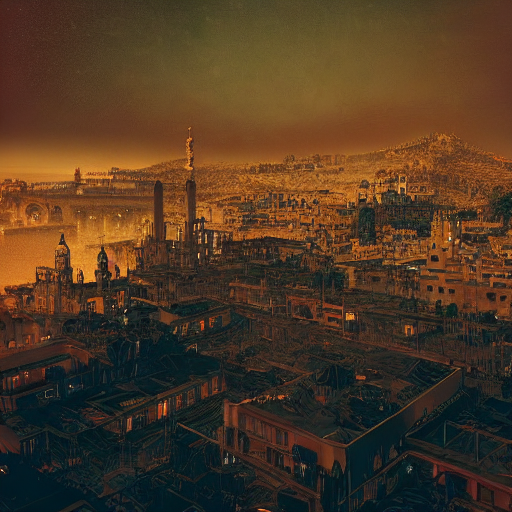

In [ ]:
#@title Configuration { vertical-output: true, form-width: "50%" }

# Set the number of inference steps to use
steps = 100 #@param {type:"slider", min:1, max:100, step:1}
# Define the text prompt
prompt = "a beautiful matte masterpiece of futuristic Granada Andalusia at night by atelier olschinsky and moebius, trending on artstation, featured on behance " #@param {type:"string"}
#@markdown * Prompts examples in https://lexica.art/
# Define the seed prompt
seed = -54671810081 #@param {type:"raw"}
enable_NSFW = True #@param {type:"boolean"}

if enable_NSFW:
  pipe.safety_checker = dummy
if seed == None:
  seed = random.randint(-99999999999,99999999999)
print('seed:',seed)
# Set the random seed for deterministic output
generator = torch.Generator("cuda").manual_seed(seed)

# Generate the image
image = pipe(prompt, num_inference_steps=steps, generator=generator).images[0]
# image = pipe(prompt, num_inference_steps=steps).images[0]
image